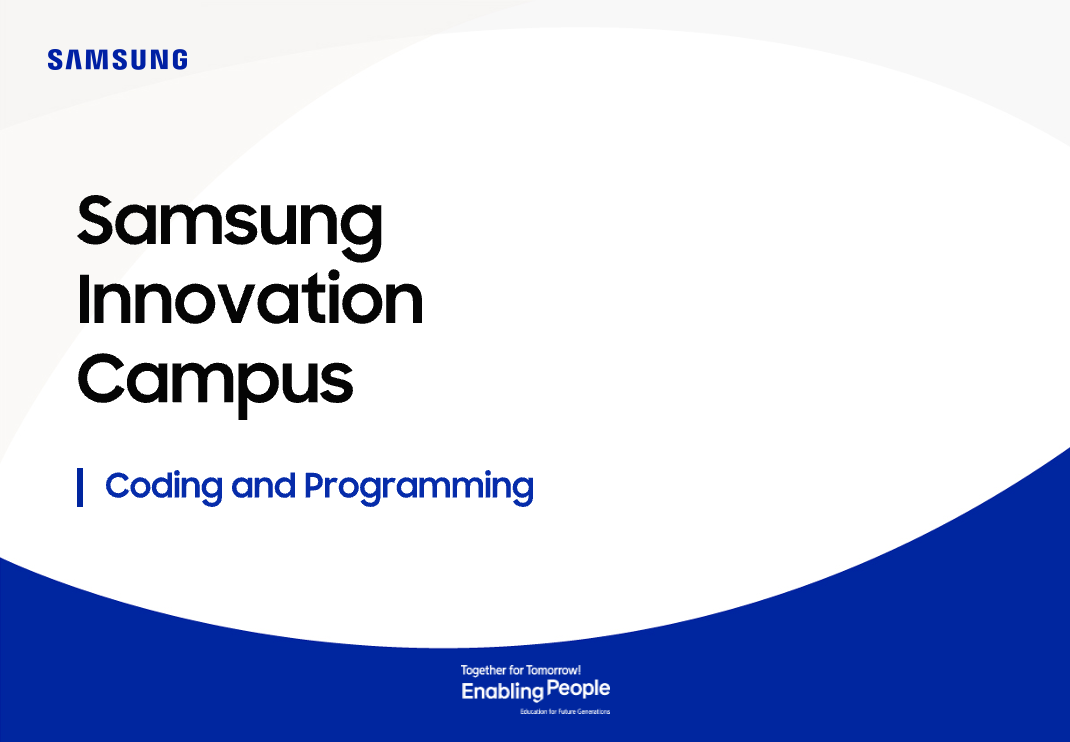

# <font size="50" color="lighblue">Análisis exploratorio de datos: </font><br> <font size="6" color="lighblue">Vectores NumPy para computación numérica optimizada y Pandas <br> Curso de AI</font>

## <font size="6" color="lighblue">Descripción del capítulo</font>

### *Descripción de los objetivos:*
* Comprender el uso preciso de NumPy y ser capaz de procesar datos de manera eficiente.
* Aprender los conceptos básicos de los vectores NumPy, la indexación y la división de NumPy (slicing) y las diversas formas de su aplicación.
* Aprender a crear y manejar series y objetos de marcos de datos (data frame objects).
* Conocer los métodos apropiados de ejecución óptima del modelo para el preprocesamiento de datos utilizando la librería Pandas para explorar y convertir datos.
* Ser capaz de encontrar el método de análisis adecuado implementando una visualización de datos adecuada para la escala de datos.

### *Contenidos del capítulo*
* Unidad 1. Estructura de datos de matriz NumPy para un rendimiento computacional óptimo
* **Unidad 2. Exploración óptima de datos a través de Pandas**
* Unidad 3. Preprocesamiento de datos de Pandas para una ejecución óptima del modelo
* Unidad 4. Visualización de datos para varias escalas de datos

# **Unidad 2:** Exploración óptima de datos a través de Pandas

2.1. Pipelines: estructuras de datos según tipos de datos<br>
2.2. Serie Pandas y DataFrames<br>
2.3. Fusionar y vincular marcos de datos<br>
2.4. Clasificación de marcos de datos y índice múltiple<br>
**2.5. Examinar las características de los datos mediante estadísticas descriptivas y muestras de datos**<br>

## 2.5. Examinar las características de los datos mediante estadísticas descriptivas y muestras de datos

### Resumen de marco de datos
#### Agrupar y resumir

In [ ]:
import pandas as pd
import os

In [ ]:
## ADVERTENCIA: Comentar esta celda si NO está trabajando dentro de Google Colaboratory
from google.colab import drive
drive.mount('/content/drive')
os.getcwd()
os.chdir("/content/drive/MyDrive/Ejercicio_Febrero_2024") ## Cambie esta ruta por la de su sistema de archivos
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Ejercicio_Febrero_2024'

In [ ]:
# En Jupyter: Dirígete al directorio donde se encuentra el archivo de datos.
try:
  os.chdir(r'~~') # Por favor, reemplaza la ruta en tu PC a 'data_studentlist.csv'
except:
  print('archivo no encontrado')

In [ ]:
df=pd.read_csv('data_studentlist.csv')
df.head(3)

,Name,Gender,Age,Grade,Absence,Bloodtype,Height,Weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.groupby (['gender','bloodtype'])['height'].mean()

gender  bloodtype
F       A            172.450000
        AB           170.100000
        B            158.200000
        O            164.433333
M       A            165.700000
        AB           181.050000
        B            174.550000
        O            166.200000
Name: height, dtype: float64

### Pivotar
#### Manipular los índices y las columnas y luego resumir.

In [ ]:
my_dict= {"Size": ['L', 'L', 'M', 'M', 'S', 'S', 'S', 'S', 'S'],
          "Type": ['A','A','A','B', 'B', 'A', 'A', 'B', 'B'],
          "Location": ['L1','L1','L1','L2','L2', 'L1','L2','L2','L1'],
          "A": [1, 2, 2, 3, 3, 4, 5, 6, 7],
          "B": [2, 4, 5, 5, 6, 6, 8, 9, 9]}
df = pd.DataFrame(my_dict)
df

,Size,Type,Location,A,B
0,L,A,L1,1,2
1,L,A,L1,2,4
2,M,A,L1,2,5
3,M,B,L2,3,5
4,S,B,L2,3,6
5,S,A,L1,4,6
6,S,A,L2,5,8
7,S,B,L2,6,9
8,S,B,L1,7,9


### Indexar por 'Tamaño' y 'Tipo'. Columnas por 'Ubicación'. Valores proporcionados por la columna 'B'.

In [ ]:
dfr= pd.pivot_table(df, index=['Size','Type'], columns='Location', values='B')
dfr

Location    L1   L2
Size Type          
L    A     3.0  NaN
M    A     5.0  NaN
     B     NaN  5.0
S    A     6.0  8.0
     B     9.0  7.5

In [ ]:
dfr.columns

Index(['L1', 'L2'], dtype='object', name='Location')

In [ ]:
dfr.index

MultiIndex([('L', 'A'),
            ('M', 'A'),
            ('M', 'B'),
            ('S', 'A'),
            ('S', 'B')],
           names=['Size', 'Type'])

In [ ]:
pd.pivot_table(df, index=['Size', 'Type'], columns='Location', values='B', fill_value=0)

Location   L1   L2
Size Type         
L    A      3  0.0
M    A      5  0.0
     B      0  5.0
S    A      6  8.0
     B      9  7.5

Igual que el resultado en **Línea 8**, pero cambia o rellena los valores NaN con con 0.

In [ ]:
import numpy as np

In [ ]:
pd.pivot_table(df, index=['Size', 'Type'], columns='Location', values='B', aggfunc = np.mean, fill_value=0)

Location   L1   L2
Size Type         
L    A      3  0.0
M    A      5  0.0
     B      0  5.0
S    A      6  8.0
     B      9  7.5

Igual que el resultado en **Línea 11**, con la función de agregación especificada.

#### Indexar por 'Tamaño' y 'Tipo'. Columnas por 'Ubicación'. Valores proporcionados por la columna 'B'.

In [ ]:
dfr=pd.pivot_table(df, index='Location', columns=['Size','Type'], values='B',)
dfr

Size        L    M         S     
Type        A    A    B    A    B
Location                         
L1        3.0  5.0  NaN  6.0  9.0
L2        NaN  NaN  5.0  8.0  7.5

In [ ]:
dfr.index

Index(['L1', 'L2'], dtype='object', name='Location')

In [ ]:
dfr.columns

MultiIndex([('L', 'A'),
            ('M', 'A'),
            ('M', 'B'),
            ('S', 'A'),
            ('S', 'B')],
           names=['Size', 'Type'])

**$</>$ Línea [16] **<br>
Ahora, objeto de Índice múltiple para las columnas.

* La función de agregación es NumPy.median()

In [ ]:
pd.pivot_table(df, index=['Size','Type'], columns ='Location', values='B', aggfunc = np.median, fill_value=0)

Location   L1   L2
Size Type         
L    A      3  0.0
M    A      5  0.0
     B      0  5.0
S    A      6  8.0
     B      9  7.5

* Promedios grupales de las columnas 'A' y 'B'

In [ ]:
pd.pivot_table(df, index=['Size','Type'], values=['A','B'], aggfunc = np.mean)

A  B
Size Type             
L    A     1.500000  3
M    A     2.000000  5
     B     3.000000  5
S    A     4.500000  7
     B     5.333333  8

* Ahora, con el método groupby(). El resultado es el mismo.

In [ ]:
df.groupby(['Size', 'Type']) [['A','B']].mean()

A    B
Size Type               
L    A     1.500000  3.0
M    A     2.000000  5.0
     B     3.000000  5.0
S    A     4.500000  7.0
     B     5.333333  8.0

* Agregar las columnas 'A' y 'B' de manera diferente.

In [ ]:
pd.pivot_table(df, index=['Size','Type'], values = ['A', 'B'], aggfunc={'A': np.max, 'B': np.min})

A  B
Size Type      
L    A     2  2
M    A     2  5
     B     3  5
S    A     5  6
     B     7  6

#### Estadísticas

In [ ]:
df.sum(axis=0)
df.sum(axis=1)
df.mean(axis=0, skipna=False)
df.describe()
df.count(axis=0)
df.A.corr(df.B)
df.corr()
df.corrwith(df.A)

          A         B
A  1.000000  0.959403
B  0.959403  1.000000


<ipython-input-22-97dab183f0b8>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum(axis=1)
<ipython-input-22-97dab183f0b8>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean(axis=0, skipna=False)
<ipython-input-22-97dab183f0b8>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
<ipython-input-22-97dab183f0b8>:8: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated.

A    1.000000
B    0.959403
dtype: float64

**$</>$ Línea [22-1]**<br>
Sumas de columnas<br>

**$</>$ Línea [22-2]**<br>
Sumas de filas<br>

**$</>$ Línea [22-3]**<br>
Promedios de columnas sin omitir los valores faltantes<br>

**$</>$ Línea [22-4]**<br>
Estadísticas descriptivas de las columnas (variables)<br>

**$</>$ Línea [22-5]**<br>
Valores no faltantes a lo largo de las columnas<br>
**$</>$ Línea [22-6]**<br>
Correlación entre la columna 'A' y la columna 'B'<br>
**$</>$ Línea [22-7]**<br>
Matriz de correlación tomando las variables numéricas por pares<br>
**$</>$ Línea [22-8]**<br>
Correlaciones entre 'A' y las otras variables numéricas<br>

#### Detección y procesamiento de valores faltantes

In [ ]:
df.isnull()
df.isnull().sum(axis=0)
print((df.isnull()).mean(axis=0))

df.dropna(axis=0)
df.dropna(axis=1)
df.dropna(axis=0, thresh=3)
df.fillna(value=0)

Size        0.0
Type        0.0
Location    0.0
A           0.0
B           0.0
dtype: float64


,Size,Type,Location,A,B
0,L,A,L1,1,2
1,L,A,L1,2,4
2,M,A,L1,2,5
3,M,B,L2,3,5
4,S,B,L2,3,6
5,S,A,L1,4,6
6,S,A,L2,5,8
7,S,B,L2,6,9
8,S,B,L1,7,9


**$</>$ Línea [23-1]**<br>
Un Marco de Datos con Verdadero donde se encuentran los valores faltantes.<br>
**$</>$ Línea [23-2]**<br>
Cuenta los valores faltantes para cada columna.<br>
**$</>$ Línea [23-3]**<br>
Proporciones de los valores faltantes para cada columna.<br>
**$</>$ Línea [23-4]**<br>
Elimina las filas donde se encuentran uno o más valores faltantes.<br>
**$</>$ Línea [23-5]**<br>
Elimine las columnas donde se encuentran uno o más valores faltantes.<br>
**$</>$ Línea [23-6]**<br>
Elimine las filas con menos de 3 valores normales.<br>
**$</>$ Línea [23-7]**<br>
Completa los valores que faltan con 0.<br>

# **Ejercicio de codificación #0108**

<font size="50" color="lighblue">ARCHIVO ex_0108.ipynb</font>

**NOTA: DE QUÉ SE TRATA ESTA PRÁCTICA**<br>
En esta práctica, aprenderás a realizar estadísticas descriptivas con pandas. Además, aprenderás a tratar adecuadamente los valores faltantes.

**INSTRUCCIÓN DE PRÁCTICA**<br>
Inicia Jupyter Notebook.
En Jupyter Notebook, da clic en el archivo ex_0108.ipynb en la carpeta Ejercicio de codificación.

Revisa los ejemplos sobre los  siguientes temas:
* Estadísticas con pandas.
* Leer datos en un DataFrame.
* Estadísticas utilizando métodos DataFrame.
* Cortar y luego aplicar un método estadístico.
* Valores faltantes.
* Estadísticas de los valores faltantes.
* Detectar y procesar los valores faltantes.
* Completa los valores que faltan.


### 1. MultiIndex:

In [ ]:
import pandas as pd
import numpy as np
import os

#### 1.1. Creando un DataFrame con MultiIndex:

In [ ]:
my_header = ['A','B','C']

In [ ]:
my_index_out = ['G1']*2 + ['G2']*2 + ['G3']*2
my_index_in = ['a', 'b']*3

In [ ]:
my_index_zipped = list(zip(my_index_out, my_index_in))
my_index_zipped

In [ ]:
my_multi_index = pd.MultiIndex.from_tuples(my_index_zipped)
df = pd.DataFrame(data=np.random.randn(6,3),index=my_multi_index,columns=my_header)

In [ ]:
df

#### 1.2. Indexación y división de DataFrames con MultiIndex:

In [ ]:
df.loc['G1']

In [ ]:
# Indexación seguida de otra indexación.
df.loc['G1'].loc['a']

In [ ]:
# Indexación seguida de otra indexación.
df.loc['G1'].loc['a','B']

### 2. Resumen del marco de datos:
#### 2.1. Agrupar por método:

In [ ]:
## ADVERTENCIA: Comentar esta celda si NO está trabajando dentro de Google Colaboratory
from google.colab import drive
drive.mount('/content/drive')
os.getcwd()
os.chdir("/content/drive/MyDrive/SIC2023/Datos") ## Cambie esta ruta por la de su sistema de archivos
os.getcwd()

In [ ]:
# En Jupyter: Dirígete al directorio donde se encuentra el archivo de datos.
try:
  os.chdir(r'~~') # Por favor, reemplaza la ruta en tu PC a 'data_studentlist.csv'
except:
  print('archivo no encontrado')

In [ ]:
df = pd.read_csv('data_studentlist.csv',header='infer')

In [ ]:
df.head(3)

In [ ]:
# error!!!
# df.groupby('gender').mean()

In [ ]:
df.groupby('gender')['height'].mean()

In [ ]:
df.groupby('gender')[['height','weight']].mean()

In [ ]:
df.groupby('gender')[['grade','age']].std()

In [ ]:
df.groupby('gender')['height'].describe()

In [ ]:
sr = df.groupby(['gender','bloodtype'])['height'].mean()     # MultiIndexed result.
sr

In [ ]:
sr.loc['F']

In [ ]:
sr.loc['F'].loc['A']

#### 2.2. Métodos en DataFrame:

In [ ]:
df['height'].apply(lambda x: x/100)

In [ ]:
df.sort_values(by='bloodtype')

In [ ]:
df.sort_values(by='bloodtype', ascending=False)

In [ ]:
df.sort_values(by=['bloodtype','gender'])

In [ ]:
df['bloodtype'].unique()

In [ ]:
df['bloodtype'].nunique()

In [ ]:
# Tabla de frecuencia.
df['bloodtype'].value_counts()

In [ ]:
# Tabla de frecuencia.
df['gender'].value_counts()

#### 2.3. Pivotando:

In [ ]:
my_dict = {"Size": ["L", "L", "M", "M", "M", "S", "S", "S", "S"],
           "Type": ["A", "A", "A", "B", "B", "A", "A", "B", "B"],
            "Location": ["L1", "L1", "L1", "L2", "L2", "L1", "L2", "L2", "L1"],
            "A": [1, 2, 2, 3, 3, 4, 5, 6, 7],
            "B": [2, 4, 5, 5, 6, 6, 8, 9, 9]}
df = pd.DataFrame(my_dict)
df

# Índice por 'Size' y 'Type'. Columnas por 'Ubicación'. Valores proporcionados por la columna 'B'.

In [ ]:
dfr = pd.pivot_table(df, index=['Size','Type'], columns='Location', values='B')
dfr

In [ ]:
dfr.columns

In [ ]:
dfr.index      # ¡Objeto multiíndice!

In [ ]:
# Lo mismo que arriba, pero completa los valores faltantes con 0.
pd.pivot_table(df, index=['Size','Type'], columns='Location', values='B', fill_value=0)

In [ ]:
# Lo mismo que arriba con la función de agregación especificada.
pd.pivot_table(df, index=['Size','Type'], columns='Location', values='B', aggfunc = np.mean, fill_value=0)


In [ ]:
# Índice por 'Location'. Columnas por 'Size' y 'Type'. Valores proporcionados por la columna 'B'.
dfr = pd.pivot_table(df, index='Location', columns=['Size','Type'], values='B')
dfr

In [ ]:
dfr.index

In [ ]:
dfr.columns      # Ahora, objeto MultiIndex para las columnas.

In [ ]:
# La función de agregación es numpy.median().
pd.pivot_table(df, index=['Size','Type'], columns='Location', values='B', aggfunc = np.median, fill_value=0)

In [ ]:
# Promedios de grupo de las columnas 'A' y 'B'.
pd.pivot_table(df, index=['Size','Type'], values=['A','B'], aggfunc=np.mean)

In [ ]:
# Ahora, con el método groupby().
# El resultado es el mismo.
df.groupby(['Size','Type'])[['A','B']].mean()

In [ ]:
# Agregue de manera diferente las columnas 'A' y 'B'.
pd.pivot_table(df, index=['Size','Type'], values=['A','B'], aggfunc={'A':np.max,'B':np.min})


# **Ejercicio de codificación #0109**

<font size="50" color="lighblue">ARCHIVO ex_0109.ipynb</font>

**NOTA: DE QUÉ SE TRATA ESTA PRÁCTICA**<br>
En esta práctica, aprenderás a realizar estadísticas descriptivas con pandas. Además, aprenderás a tratar adecuadamente los valores faltantes.

**INSTRUCCIÓN DE PRÁCTICA**<br>
Inicia Jupyter Notebook.
En Jupyter Notebook, da clic en el archivo ex_0109.ipynb en la carpeta Ejercicio de codificación.

Revisa los ejemplos sobre los  siguientes temas:
* Índice múltiple.
 * Creando un DataFrame con MultiIndex.
 * Indexación y división de DataFrames con MultiIndex.
* Resumen del DataFrame.
 * Método de agrupación.
 * Métodos de marco de datos.
 * Pivotante.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 1. Visualización básica de Matplotlib:
#### 1.1. Trama de barras:

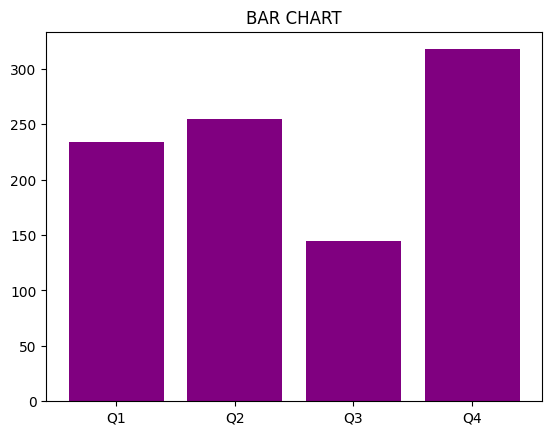

In [ ]:
x = np.array(['Q1', 'Q2', 'Q3','Q4'])
y = np.array([ 234.0, 254.7, 144.6, 317.6])
plt.bar(x,y,color = 'purple')
plt.title('BAR CHART')
plt.show()

#### 1.2. Histograma:

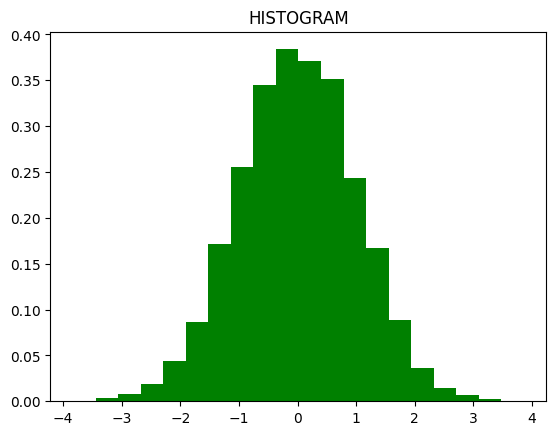

In [ ]:
x = np.random.randn(10000)
plt.hist(x,bins=20,color='green',density=True)
plt.title('HISTOGRAM')
plt.show()

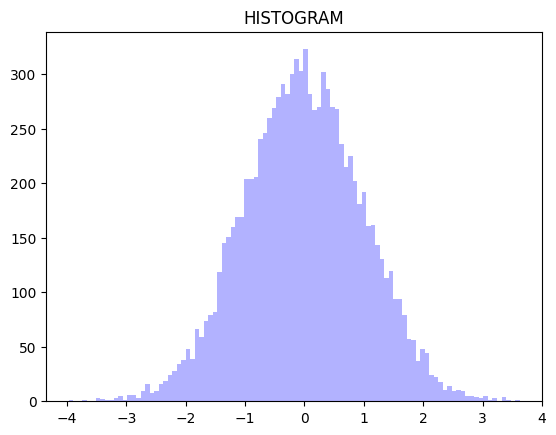

In [ ]:
x = np.random.randn(10000)
plt.hist(x,bins=100,color='blue',density=False,alpha=0.3)
plt.title('HISTOGRAM')
plt.show()

#### 1.3. Box plot:

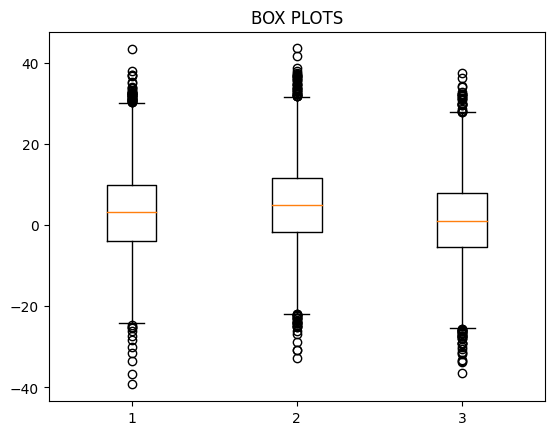

In [ ]:
x = np.random.randn(10000)*10+3
y = np.random.randn(10000)*10+5
z = np.random.randn(10000)*10+1
plt.boxplot([x,y,z],0)
plt.title('BOX PLOTS')
plt.show()

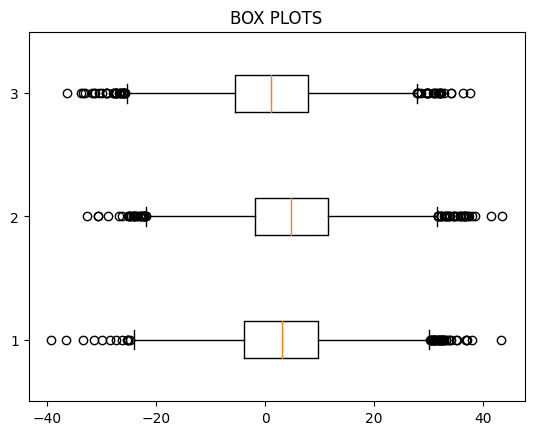

In [ ]:
plt.boxplot([x,y,z],0,vert=False)
plt.title('BOX PLOTS')
plt.show()

#### 1.4. Line plot:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

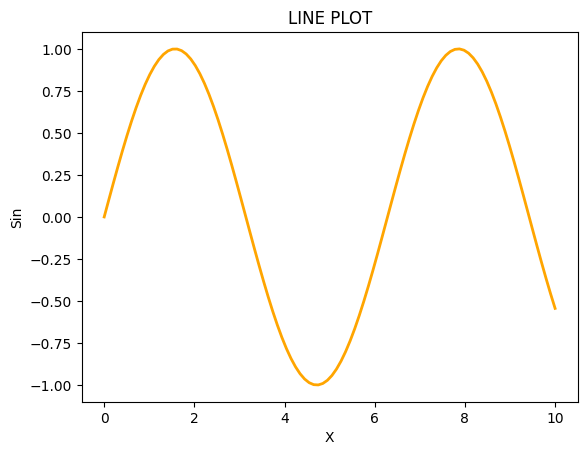

In [3]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y,color='orange',linewidth=2)       # estilo de linea linestyle = '-'
plt.xlabel('X')
plt.ylabel('Sin')
plt.title('LINE PLOT')
plt.show()

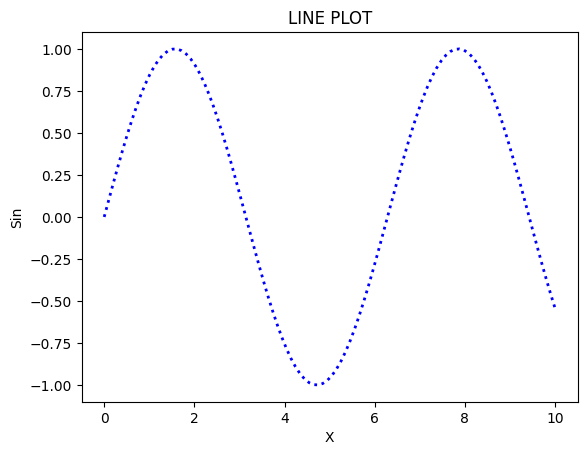

In [4]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y,color='blue',linestyle=':',linewidth=2)
plt.xlabel('X')
plt.ylabel('Sin')
plt.title('LINE PLOT')
plt.show()

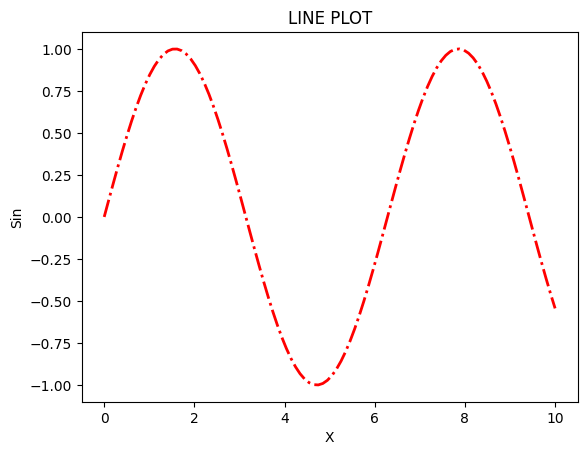

In [5]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y,color='red',linestyle='-.',linewidth=2)
plt.xlabel('X')
plt.ylabel('Sin')
plt.title('LINE PLOT')
plt.show()

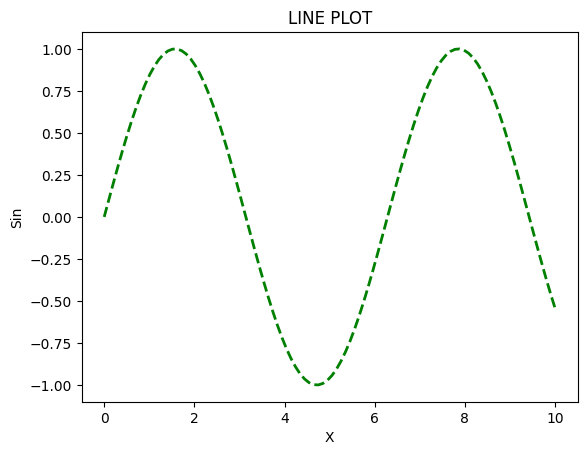

In [6]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y,color='green',linestyle='--',linewidth=2)
plt.xlabel('X')
plt.ylabel('Sin')
plt.title('LINE PLOT')
plt.show()

In [ ]:
# error!!!
# x = np.linspace(0,10,100)
# y = np.sin(x)
# plt.plot(x,y,color='purple',linestyle='steps',linewidth=2)
# plt.xlabel('X')
# plt.ylabel('Sin')
# plt.title('LINE PLOT')
# plt.show()

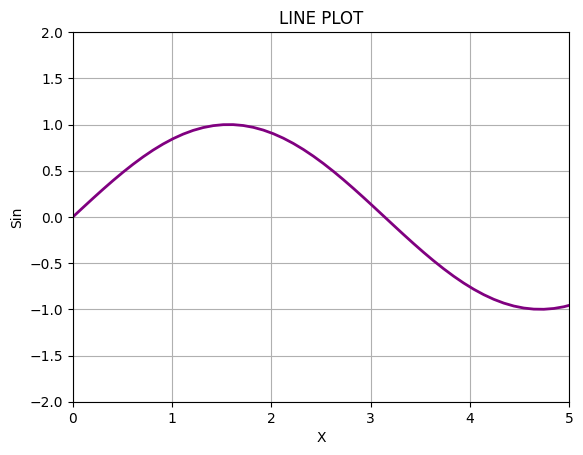

In [8]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y,color='purple',linestyle='-',linewidth=2)
plt.xlabel('X')
plt.ylabel('Sin')
plt.title('LINE PLOT')
plt.xlim([0,5])                                     # límites del eje horizontal
plt.ylim([-2,+2])
plt.grid()                                # límites del eje vertical
plt.show()

#### 1.5. Scatter plot 1:

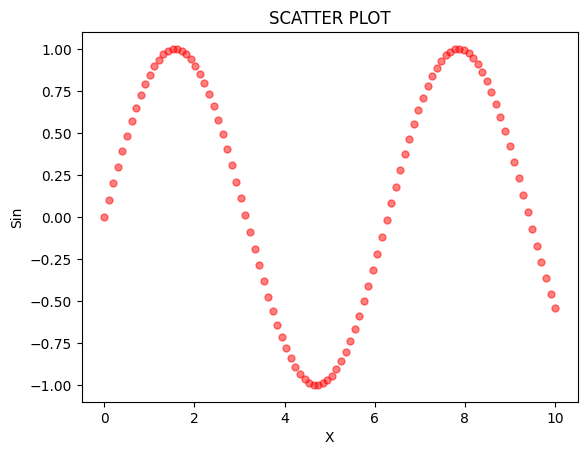

In [11]:
#Scatter plots with plot() function and linestyle ='none':
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y,color='red',marker='o',linestyle='none',markersize=5, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Sin')
plt.title('SCATTER PLOT')
plt.show()

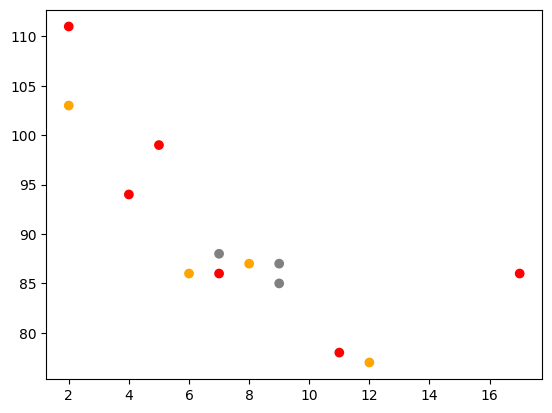

In [41]:
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
z = np.array(['silver', 'silver', 'Gold', 'Platinum','silver', 'silver', 'Gold', 'Platinum', 'silver', 'silver', 'Gold', 'Platinum', 'Gold' ])

dictCol={"silver":'red', "Gold":"orange", "Platinum":"gray"}
#pd.DataFrame(z)
l=[]
for i in z:
  l.append(dictCol[i])

#pd.DataFrame(z).apply(lambda x: dictCol.getitem(x))
#dictCol['silver', 'silver', 'Gold', 'Platinum','silver', 'silver', 'Gold', 'Platinum', 'silver', 'silver', 'Gold', 'Platinum', 'Gold']

plt.scatter(x, y, c=l)

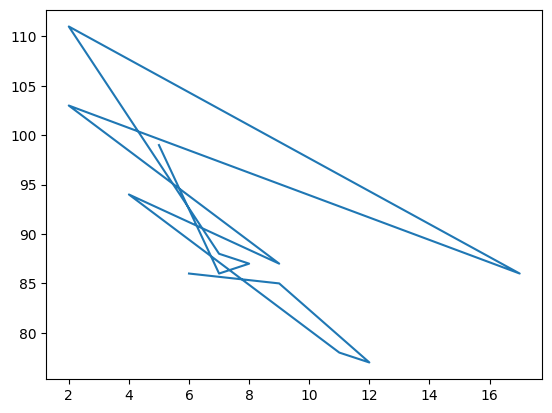

In [14]:
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
plt.plot(x, y)

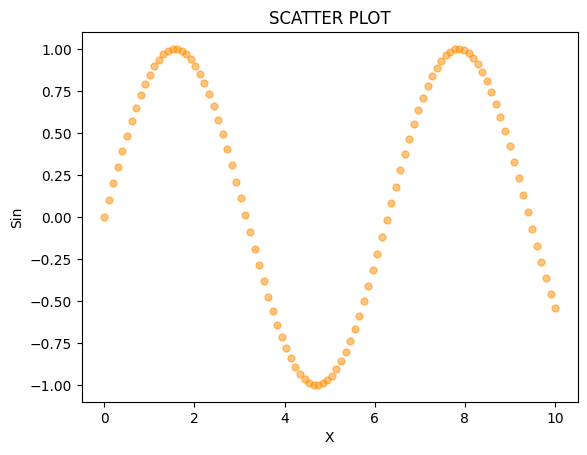

In [10]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y,color='#FF8C00',marker='o',linestyle='none',markersize=5, alpha=0.5)     # RGB color.
plt.xlabel('X')
plt.ylabel('Sin')
plt.title('SCATTER PLOT')
plt.show()

In [ ]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y,marker='o',linestyle='none',markersize=15,markerfacecolor='yellow',markeredgecolor='purple',markeredgewidth=2)
plt.xlabel('X')
plt.ylabel('Sin')
plt.title('SCATTER PLOT')
plt.show()

#### 1.6. Scatter plot 2:

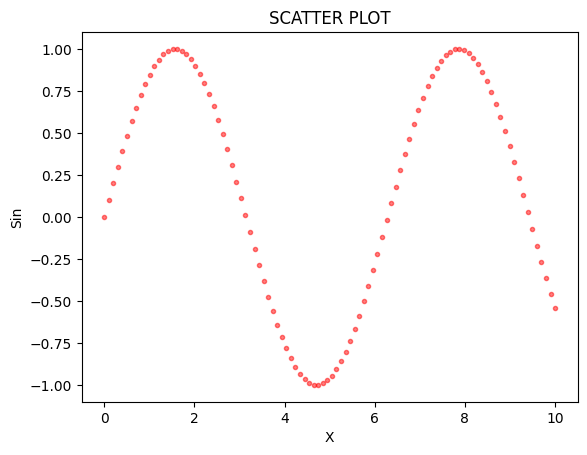

In [12]:
#Scatter plots with scatter() function:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.scatter(x,y,c='red',marker='.',alpha=0.5)
plt.xlabel('X')
plt.ylabel('Sin')
plt.title('SCATTER PLOT')
plt.show()

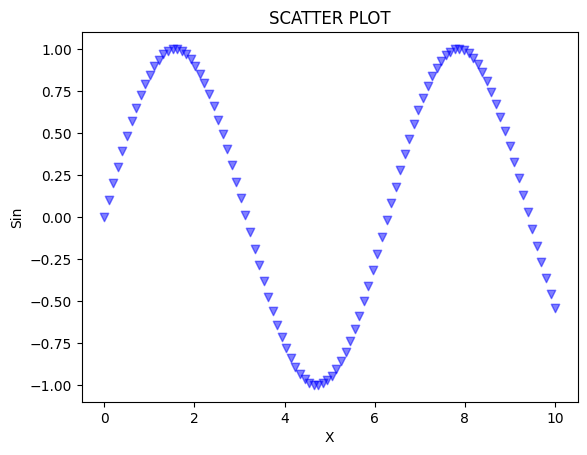

In [42]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.scatter(x,y,c='blue',marker='v',alpha=0.5)
plt.xlabel('X')
plt.ylabel('Sin')
plt.title('SCATTER PLOT')
plt.show()

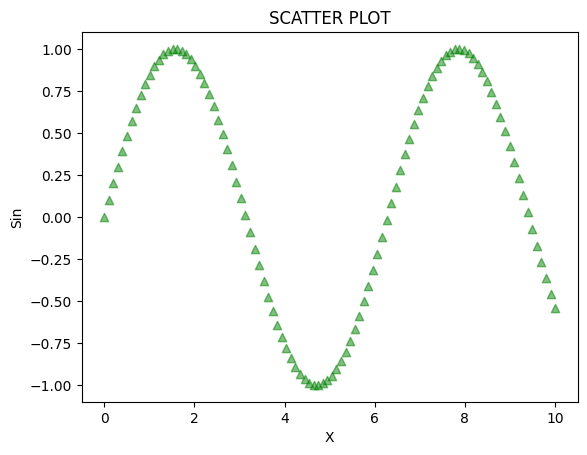

In [46]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.scatter(x,y,c='green',marker='^',alpha=0.5)
plt.xlabel('X')
plt.ylabel('Sin')
plt.title('SCATTER PLOT')
plt.show()

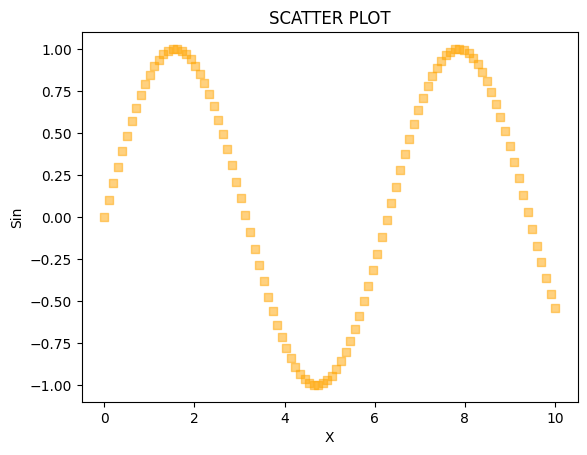

In [47]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.scatter(x,y,c='orange',marker='s',alpha=0.5)
plt.xlabel('X')
plt.ylabel('Sin')
plt.title('SCATTER PLOT')
plt.show()

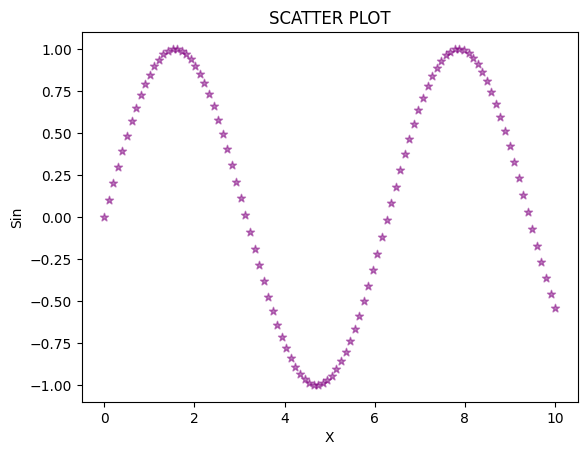

In [48]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.scatter(x,y,c='purple',marker='*',alpha=0.5)
plt.xlabel('X')
plt.ylabel('Sin')
plt.title('SCATTER PLOT')
plt.show()

In [ ]:
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
z = np.array(['silver', 'silver', 'Gold', 'Platinum','silver', 'silver', 'Gold', 'Platinum', 'silver', 'silver', 'Gold', 'Platinum', 'Gold' ])

dictCol={"silver":'red', "Gold":"orange", "Platinum":"gray"}


l = list(map(lambda x: dictCol[x], z))
plt.scatter(x, y, c=l)